# Capstone Project 1: Healthcare
### Byju N Govindan, 06/16/2022

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy.stats

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
colors = ['royalblue','red','deeppink', 'maroon', 'mediumorchid', 'tan', 'forestgreen', 'olive', 'goldenrod', 'lightcyan', 'navy']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])

import warnings
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)


### Project Task: Week 1: Exploratory Data Analysis:

In [3]:
#  Load the data and labels in dataframe

data = pd.read_csv('data.csv',delimiter=',')
label = pd.read_csv('labels.csv',delimiter=',',)

In [4]:
print(type(data))
print(type(label)) 

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [5]:
print("=======================================================================")
print("The dimension of data:")
print("The data has ", data.shape[0], " rows and ", data.shape[1], "columns")

print(" ")

print("The dimension of label:")
print("The label has ", label.shape[0], " rows and ", label.shape[1], "columns")
print("=======================================================================")

The dimension of data:
The data has  801  rows and  20532 columns
 
The dimension of label:
The label has  801  rows and  2 columns


In [6]:
data.head(3) # display 3 rows of data

,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0


In [7]:
label.head(3) # display 3 rows of label

,Unnamed: 0,Class
0,sample_0,PRAD
1,sample_1,LUAD
2,sample_2,PRAD


In [8]:
data.describe()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.0,801.000000,801.000000,801.000000,801.000000,...,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000
mean,0.026642,3.010909,3.095350,6.722305,9.813612,0.0,7.405509,0.499882,0.016744,0.013428,...,5.896573,8.765891,10.056252,4.847727,9.741987,11.742228,10.155271,9.590726,5.528177,0.095411
std,0.136850,1.200828,1.065601,0.638819,0.506537,0.0,1.108237,0.508799,0.133635,0.204722,...,0.746399,0.603176,0.379278,2.382728,0.533898,0.670371,0.580569,0.563849,2.073859,0.364529
min,0.000000,0.000000,0.000000,5.009284,8.435999,0.0,3.930747,0.000000,0.000000,0.000000,...,2.853517,6.678368,8.669456,0.000000,7.974942,9.045255,7.530141,7.864533,0.593975,0.000000
25%,0.000000,2.299039,2.390365,6.303346,9.464466,0.0,6.676042,0.000000,0.000000,0.000000,...,5.454926,8.383834,9.826027,3.130750,9.400747,11.315857,9.836525,9.244219,4.092385,0.000000
50%,0.000000,3.143687,3.127006,6.655893,9.791599,0.0,7.450114,0.443076,0.000000,0.000000,...,5.972582,8.784144,10.066385,5.444935,9.784524,11.749802,10.191207,9.566511,5.218618,0.000000
75%,0.000000,3.883484,3.802534,7.038447,10.142324,0.0,8.121984,0.789354,0.000000,0.000000,...,6.411292,9.147136,10.299025,6.637412,10.082269,12.177852,10.578561,9.917888,6.876382,0.000000
max,1.482332,6.237034,6.063484,10.129528,11.355621,0.0,10.718190,2.779008,1.785592,4.067604,...,7.771054,11.105431,11.318243,9.207495,11.811632,13.715361,11.675653,12.813320,11.205836,5.254133


In [9]:
# Project Task: Week 1: Exploratory Data Analysis: Merge both the datasets based on same index.
merged_data = pd.merge(label,data)
merged_data.head(10)          

,Unnamed: 0,Class,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,sample_0,PRAD,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,sample_1,LUAD,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,sample_2,PRAD,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,sample_3,PRAD,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,sample_4,BRCA,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0
5,sample_5,PRAD,0.0,3.467853,3.581918,6.620243,9.706829,0.0,7.758510,0.000000,...,5.726657,8.602588,9.928339,6.096154,9.816001,11.556995,9.244150,9.836473,5.355133,0.0
6,sample_6,KIRC,0.0,1.224966,1.691177,6.572007,9.640511,0.0,6.754888,0.531868,...,5.105904,7.927968,9.673966,1.877744,9.802692,13.256060,9.664486,9.244219,8.330912,0.0
7,sample_7,PRAD,0.0,2.854853,1.750478,7.226720,9.758691,0.0,5.952103,0.000000,...,5.297833,8.277092,9.599230,5.244290,9.994339,12.670377,9.987733,9.216872,6.551490,0.0
8,sample_8,BRCA,0.0,3.992125,2.772730,6.546692,10.488252,0.0,7.690222,0.352307,...,6.721974,9.597533,9.763753,7.933278,10.952880,12.498919,10.389954,10.390255,7.828321,0.0
9,sample_9,PRAD,0.0,3.642494,4.423558,6.849511,9.464466,0.0,7.947216,0.724214,...,6.020051,8.712809,10.259096,6.131583,9.923582,11.144295,9.244851,9.484299,4.759151,0.0


In [10]:
#Unique values in the label for the target column Class
merged_data.Class.unique() # There are five unique categories or levels for the target feature "Class"
# breast cancer -'BRCA', renal cancer - 'KIRC', colon cancer - 'COAD', lung cancer - 'LUAD', and prostate cancer - 'PRAD'

array(['PRAD', 'LUAD', 'BRCA', 'KIRC', 'COAD'], dtype=object)

In [11]:
merged_data.isnull().sum()

Unnamed: 0    0
Class         0
gene_0        0
gene_1        0
gene_2        0
             ..
gene_20526    0
gene_20527    0
gene_20528    0
gene_20529    0
gene_20530    0
Length: 20533, dtype: int64

In [12]:
print(merged_data.isnull().sum()[merged_data.isnull().sum() > 0])

Series([], dtype: int64)


In [13]:
#display the list of column names with nans: There are no columns with nans
[features for features in merged_data.columns if merged_data[features].isnull().sum()>0]

[]

<AxesSubplot:>

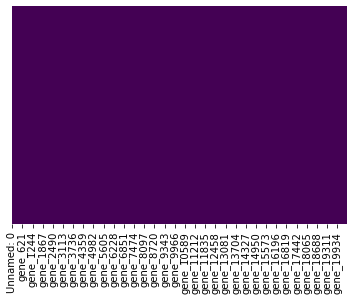

In [14]:
sns.heatmap(merged_data.isnull(),yticklabels=False,cbar=False,cmap='viridis') # Heatmap showing no null data

In [15]:
# Describe the quantitative variables in the data frame
merged_data.describe()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.0,801.000000,801.000000,801.000000,801.000000,...,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000
mean,0.026642,3.010909,3.095350,6.722305,9.813612,0.0,7.405509,0.499882,0.016744,0.013428,...,5.896573,8.765891,10.056252,4.847727,9.741987,11.742228,10.155271,9.590726,5.528177,0.095411
std,0.136850,1.200828,1.065601,0.638819,0.506537,0.0,1.108237,0.508799,0.133635,0.204722,...,0.746399,0.603176,0.379278,2.382728,0.533898,0.670371,0.580569,0.563849,2.073859,0.364529
min,0.000000,0.000000,0.000000,5.009284,8.435999,0.0,3.930747,0.000000,0.000000,0.000000,...,2.853517,6.678368,8.669456,0.000000,7.974942,9.045255,7.530141,7.864533,0.593975,0.000000
25%,0.000000,2.299039,2.390365,6.303346,9.464466,0.0,6.676042,0.000000,0.000000,0.000000,...,5.454926,8.383834,9.826027,3.130750,9.400747,11.315857,9.836525,9.244219,4.092385,0.000000
50%,0.000000,3.143687,3.127006,6.655893,9.791599,0.0,7.450114,0.443076,0.000000,0.000000,...,5.972582,8.784144,10.066385,5.444935,9.784524,11.749802,10.191207,9.566511,5.218618,0.000000
75%,0.000000,3.883484,3.802534,7.038447,10.142324,0.0,8.121984,0.789354,0.000000,0.000000,...,6.411292,9.147136,10.299025,6.637412,10.082269,12.177852,10.578561,9.917888,6.876382,0.000000
max,1.482332,6.237034,6.063484,10.129528,11.355621,0.0,10.718190,2.779008,1.785592,4.067604,...,7.771054,11.105431,11.318243,9.207495,11.811632,13.715361,11.675653,12.813320,11.205836,5.254133


In [16]:
#Count of the items for the categrical variable Class
merged_data.Class.value_counts() # index is Class and values are the counts

BRCA    300
KIRC    146
LUAD    141
PRAD    136
COAD     78
Name: Class, dtype: int64

([<matplotlib.patches.Wedge at 0x1cba5e741c0>,
 [Text(0.42244602842489287, 1.0156472581895915, 'BRCA'),
  Text(-1.0745060009455198, 0.23545032157987564, 'KIRC'),
  Text(-0.6751858801228837, -0.8684031479000334, 'LUAD'),
  Text(0.45410058834857936, -1.001894533202709, 'PRAD'),
  Text(1.0489263693942839, -0.3312906150033935, 'COAD')],
 [Text(0.2304251064135779, 0.5539894135579589, '37.45%'),
  Text(-0.5860941823339199, 0.12842744813447762, '18.23%'),
  Text(-0.3682832073397547, -0.47367444430910904, '17.60%'),
  Text(0.247691230008316, -0.5464879272014775, '16.98%'),
  Text(0.5721416560332456, -0.1807039718200328, '9.74%')])

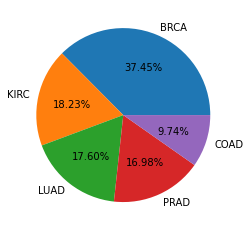

In [17]:
class_values = merged_data.Class.value_counts().values
class_index = merged_data.Class.value_counts().index
plt.pie(class_values[:5],labels=class_index[:5],autopct='%1.2f%%')
# There are five unique categories or levels for the target feature "Class"
# breast cancer -'BRCA', renal cancer - 'KIRC', colon cancer - 'COAD', lung cancer - 'LUAD', and prostate cancer - 'PRAD'
# Majority of the data are from BRCA patients, andeee1wt4fr3d  the least represented are the colon cancer patients.
# The other three categoriesrepresented nearly 17%-18% of the data

In [18]:
#Project Task: Week 1: Exploratory Data Analysis: Plot the merged dataset as a hierarchically-clustered heatmap.

heatmap_data = pd.pivot_table(merged_data, index=['Class'])
                              
heatmap_data.head()

,gene_0,gene_1,gene_10,gene_100,gene_1000,gene_10000,gene_10001,gene_10002,gene_10003,gene_10004,...,gene_9990,gene_9991,gene_9992,gene_9993,gene_9994,gene_9995,gene_9996,gene_9997,gene_9998,gene_9999
Class,,,,,,,,,,,,,,,,,,,,,
BRCA,0.011362,2.839739,0.544066,10.681488,10.303568,3.258028,7.339461,7.900497,7.489146,7.508378,...,1.969278,5.142237,1.736160,2.312551,1.696127,2.493789,0.046527,2.099709,0.151063,6.954733
COAD,0.022212,3.438381,0.357278,11.015745,9.951124,3.462039,5.526673,7.487396,3.783493,6.959238,...,2.216178,0.354828,1.833606,1.619692,3.839205,2.396207,0.090327,2.298246,0.065007,6.618466
KIRC,0.046544,2.398129,1.166824,10.238999,11.148094,1.651798,6.895752,7.686932,7.269611,7.636246,...,1.824964,0.596508,2.393303,1.872888,1.289448,3.139623,0.130416,2.387948,0.148641,6.429343
LUAD,0.041088,3.358260,0.607541,10.517670,10.503698,3.754181,7.281878,7.041924,6.145042,7.148682,...,2.609490,2.801700,2.738326,1.869805,2.217144,2.459608,0.042070,2.281828,0.056608,6.721517
PRAD,0.026544,3.441041,0.765608,10.282936,9.967433,1.949878,7.946141,8.529695,5.696368,7.396572,...,1.623491,4.594215,1.684084,2.588050,1.703772,3.568490,0.572893,3.621548,0.094953,7.104225


C:\Users\Byju\Anaconda3\lib\site-packages\seaborn\matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


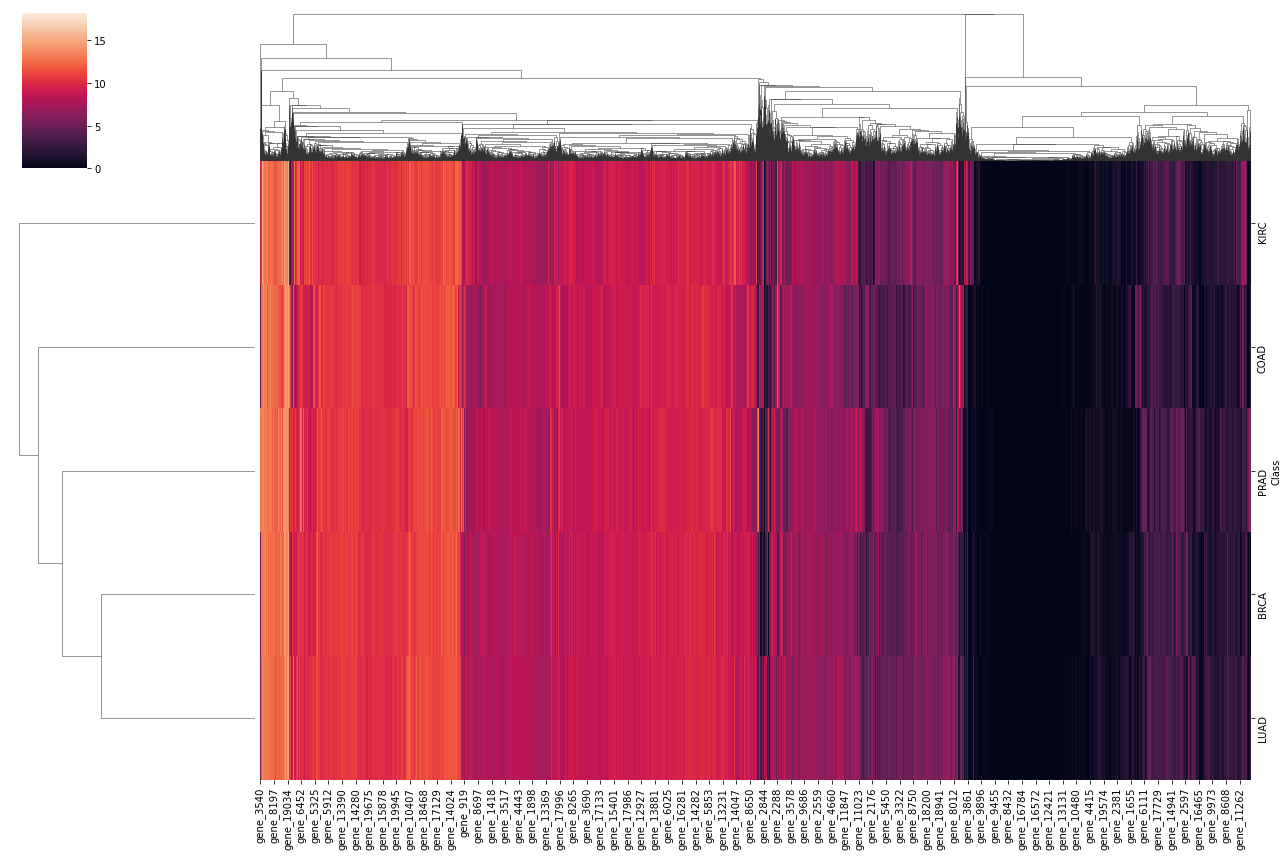

In [19]:
sns.clustermap(heatmap_data, figsize=(18,12))
plt.savefig('Hierarchically-clustered_heatmap_with_Seaborn.jpg',dpi=150)

In [20]:
#Project Task: Week 1: Exploratory Data Analysis: Perform Null-hypothesis testing.
# We will do the F-test for ANOVA.

df_f_test=merged_data

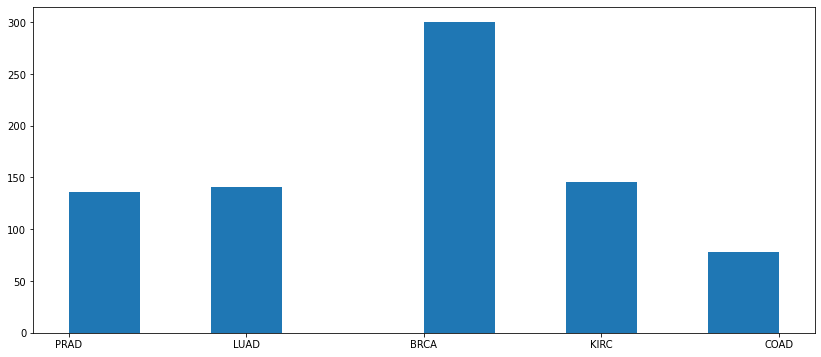

In [21]:
# Use histogram plot to check if the data is normally distributed
plt.figure(figsize=(14,6))
plt.hist(merged_data['Class'])
plt.show()

In [22]:
# The df loaded from csv have an unwanted index column named unnamed:0. Handle this column.
non_cat_data = merged_data.drop(['Unnamed: 0'], axis=1)
non_cat_data

,Class,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,PRAD,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.000000
1,LUAD,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.000000
2,PRAD,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.000000
3,PRAD,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.000000
4,BRCA,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,BRCA,0.0,1.865642,2.718197,7.350099,10.006003,0.0,6.764792,0.496922,0.0,...,6.088133,9.118313,10.004852,4.484415,9.614701,12.031267,9.813063,10.092770,8.819269,0.000000
797,LUAD,0.0,3.942955,4.453807,6.346597,10.056868,0.0,7.320331,0.000000,0.0,...,6.371876,9.623335,9.823921,6.555327,9.064002,11.633422,10.317266,8.745983,9.659081,0.000000
798,COAD,0.0,3.249582,3.707492,8.185901,9.504082,0.0,7.536589,1.811101,0.0,...,5.719386,8.610704,10.485517,3.589763,9.350636,12.180944,10.681194,9.466711,4.677458,0.586693
799,PRAD,0.0,2.590339,2.787976,7.318624,9.987136,0.0,9.213464,0.000000,0.0,...,5.785237,8.605387,11.004677,4.745888,9.626383,11.198279,10.335513,10.400581,5.718751,0.000000


In [23]:
def f_test(df_f_test,gene):  
    df_anova = df_f_test[[gene,'Class']]
    grps = pd.unique(df_anova.Class.values)
    grps
    d_data = {grp:df_anova[gene][df_anova.Class == grp] for grp in grps}
    F, p = scipy.stats.f_oneway(d_data['LUAD'], d_data['PRAD'], d_data['BRCA'], d_data['KIRC'], d_data['COAD'])
    print("F_statistics:-",F)
    print("p_values:-",p)
    if p<0.05:
        print("reject null hypothesis")
    else:
        print("accept null hypothesis")
        
    return 

In [24]:
f_test(df_f_test,"gene_0")

F_statistics:- 2.1322967854919392
p_values:- 0.07505540778266195
accept null hypothesis


In [25]:
f_test(df_f_test,"gene_1000")

F_statistics:- 180.0931919092308
p_values:- 7.612856287347603e-110
reject null hypothesis


In [26]:
f_test(df_f_test,"gene_1000")

F_statistics:- 180.0931919092308
p_values:- 7.612856287347603e-110
reject null hypothesis


In [27]:
f_test(df_f_test,"gene_20000")

F_statistics:- 17.31965303056122
p_values:- 1.23614927542531e-13
reject null hypothesis


In [28]:
f_test(df_f_test,"gene_20530")

F_statistics:- 4.581248855684393
p_values:- 0.0011587473461475769
reject null hypothesis


In [29]:
f_test(df_f_test,"gene_5")

F_statistics:- nan
p_values:- nan
accept null hypothesis


C:\Users\Byju\Anaconda3\lib\site-packages\scipy\stats\stats.py:3709: F_onewayConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(F_onewayConstantInputWarning())


In [30]:
f_test(df_f_test,"gene_8")

F_statistics:- 0.7062282419800234
p_values:- 0.5877913885898287
accept null hypothesis


In [31]:
df_catmapped = merged_data
df_catmapped['Class'] = df_catmapped['Class'].map({'PRAD': 1, 'LUAD': 2, 'BRCA': 3, 'KIRC': 4, 'COAD': 5}) 
df_catmapped = df_catmapped.drop(['Unnamed: 0'],axis=1)

In [32]:
#Shapiro test
from scipy.stats import shapiro
stat, p = shapiro(df_catmapped)
print('stat=%.2f, p=%.30f' %(stat, p))

if p > 0.05:
    print('Normal Distribution')
else:
    print('Not Normal')

stat=0.92, p=0.000000000000000000000000000000
Not Normal


C:\Users\Byju\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [33]:
# K2 normality test 
from scipy.stats import normaltest
k2_test = df_catmapped['Class']

stat, p = normaltest(k2_test)
print('stat=%.2f, p=%.30f' %(stat, p))

if p > 0.05:
    print('Normal Distribution')
else:
    print('Not Normal')

stat=48.54, p=0.000000000028833417148493984116
Not Normal


### Week 2: Dimensionality Reduction using PCA

In [34]:
# Define data 

# The df loaded from csv have an unwanted index column named unnamed:0. Handle this column.
df_pca = merged_data.drop(['Unnamed: 0'], axis=1)

# Also drop the categorical target variable Class
df_pca = df_pca.drop(['Class'], axis=1)
df_pca.head()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [35]:
df_pca.values.shape

(801, 20531)

In [36]:
x_pca = df_pca.values

#### Week2: Scaling the data using standard scaler method

In [37]:
from sklearn.preprocessing import StandardScaler
stdscaler = StandardScaler()
X_Scaled = stdscaler.fit_transform(x_pca)
X_Scaled

array([[-0.19479935, -0.82802988,  0.15980044, ..., -1.18793812,
        -0.11648251, -0.26190144],
       [-0.19479935, -2.01501735, -1.415042  , ..., -0.34227662,
        -1.65688871, -0.26190144],
       [-0.19479935,  0.41734754,  1.15673547, ...,  0.88686027,
        -1.85526414, -0.26190144],
       ...,
       [-0.19479935,  0.19888076,  0.57481583, ..., -0.22008186,
        -0.41046699,  1.3485582 ],
       [-0.19479935, -0.35045311, -0.28863152, ...,  1.43719268,
         0.09195083, -0.26190144],
       [-0.19479935, -0.57135218,  0.66725377, ...,  0.45087581,
        -0.47161901, -0.26190144]])

#### Week2: Perform PCA with n_components=2

In [38]:
# Import PCA from sklearn and define the n_components as 2 
from sklearn.decomposition import PCA
pca_cancer = PCA(n_components=2)

In [39]:
#Perform fit transform on the scaled data
X_pca_twoPC = pca_cancer.fit_transform(X_Scaled)
X_pca_twoPC.shape

(801, 2)

In [40]:
X_pca_twoPC

array([[-57.44698695,  95.41098075],
       [-16.91943004,   0.73247011],
       [-70.3452179 , -19.30332634],
       ...,
       [ -4.1330897 ,  15.6900136 ],
       [-30.81475746,  33.52642261],
       [-22.34455669,   4.05235641]])

In [41]:
print('Explained variation per principal component: {}'.format(pca_cancer.explained_variance_ratio_))

Explained variation per principal component: [0.10539781 0.08754232]


In [42]:
# Put the data back on the 2 columns defined 
df_pca = pd.DataFrame(X_pca_twoPC)
df_pca.columns = ['pca1','pca2']

# Add the convereted categorical data for 
df_pca['cancer_class']=df_catmapped['Class']
df_pca

,pca1,pca2,cancer_class
0,-57.446987,95.410981,1
1,-16.919430,0.732470,2
2,-70.345218,-19.303326,1
3,-49.161591,-9.227586,1
4,-18.132534,-51.327797,3
...,...,...,...
796,-12.417385,-42.321574,3
797,-29.415554,28.526281,2
798,-4.133090,15.690014,5
799,-30.814757,33.526423,1


<AxesSubplot:xlabel='pca1', ylabel='pca2'>

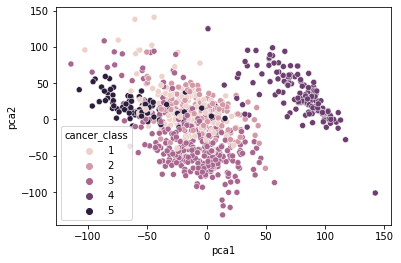

In [43]:
# Use seaborn maps to plot the data on the 5 clusters  
sns.scatterplot(x='pca1',y='pca2', hue = 'cancer_class',data=df_pca)

####  Week2: PCA with n_components=.995

In [44]:
pca_99point5 = PCA(.995)
X_pca_99point5 = pca_99point5.fit_transform(x_pca)
X_pca_99point5.shape

(801, 747)

In [45]:
X_pca_99point5

array([[-6.27554152e+01, -9.40719735e+01,  8.95198311e+01, ...,
         3.09258084e+00,  7.13597730e-01, -8.21221710e-02],
       [-2.43289636e+00,  9.05858418e+01, -1.06730787e+00, ...,
         1.39674724e-02, -3.95175744e-01, -9.49947250e-01],
       [-7.12668528e+01, -8.06460774e+00,  6.61124549e+01, ...,
         1.28898532e-01, -2.64530262e-01,  3.84594189e-01],
       ...,
       [ 1.04862615e+01,  2.15705946e+01,  4.13458784e+01, ...,
        -6.47882986e-01, -2.07256774e-01,  1.38942922e-01],
       [-5.50636049e+01, -9.23947780e+01,  8.00500394e+01, ...,
         1.74673062e+00,  2.02232239e+00, -1.92708948e+00],
       [-4.91030338e+01, -5.09976391e+01,  4.05037544e+01, ...,
         1.80367340e+00,  2.22994027e+00, -8.07255452e-01]])

In [46]:
print('Explained variation per principal component: {}'.format(pca_99point5.explained_variance_ratio_))

Explained variation per principal component: [1.58385502e-01 1.05039600e-01 9.47222083e-02 6.50080336e-02
 3.61561783e-02 2.97266705e-02 2.65714239e-02 1.56273075e-02
 1.40707327e-02 1.22687325e-02 9.60110033e-03 8.90219244e-03
 7.58205527e-03 7.23021295e-03 6.64002139e-03 6.37713380e-03
 5.69484775e-03 5.17577102e-03 4.62121409e-03 4.45511704e-03
 4.43458295e-03 4.06433767e-03 3.95469831e-03 3.73193404e-03
 3.68555898e-03 3.55682493e-03 3.48486339e-03 3.16722678e-03
 3.10381215e-03 2.95236028e-03 2.89217028e-03 2.76294055e-03
 2.73106816e-03 2.62048411e-03 2.51405018e-03 2.51115763e-03
 2.40637037e-03 2.35678917e-03 2.32169987e-03 2.25441828e-03
 2.22014731e-03 2.17486887e-03 2.12139803e-03 2.10345082e-03
 2.08597543e-03 2.04290041e-03 1.96472299e-03 1.95728543e-03
 1.93418289e-03 1.89133509e-03 1.81771843e-03 1.78520804e-03
 1.75768926e-03 1.72698808e-03 1.70410487e-03 1.67957902e-03
 1.64251866e-03 1.62876591e-03 1.61259105e-03 1.57999194e-03
 1.57141842e-03 1.55484061e-03 1.5425234

In [47]:
# 747 principal components were needed to explain 99.5% variance in the data
len(pca_99point5.explained_variance_ratio_)

747

In [48]:
# Put the data back on the x columns
df_pca_995 = pd.DataFrame(X_pca_99point5)


# Add the convereted categorical data to the above dataframe
df_pca_995['cancer_class']=df_catmapped['Class']
df_pca_995

,0,1,2,3,4,5,6,7,8,9,...,738,739,740,741,742,743,744,745,746,cancer_class
0,-62.755415,-94.071973,89.519831,-15.942567,81.423539,-13.998292,7.716073,-22.936551,-32.837892,-2.202680,...,-4.081064,-0.626193,-1.265756,-0.017984,-2.740860,0.944037,3.092581,0.713598,-0.082122,1
1,-2.432896,90.585842,-1.067308,-53.083120,-15.676684,60.842472,10.257369,-48.822959,14.257400,-12.214352,...,0.215619,-0.593678,-0.403462,1.181537,0.490910,0.197768,0.013967,-0.395176,-0.949947,2
2,-71.266853,-8.064608,66.112455,81.381475,-7.525685,109.824273,5.519407,-13.364480,38.415728,-5.124731,...,0.263786,0.328453,0.004078,0.363928,-1.109210,0.331488,0.128899,-0.264530,0.384594,1
3,-84.770785,-73.244566,74.181000,27.022697,-18.044895,50.116433,-3.495197,-11.318520,8.319656,-3.149509,...,0.381578,0.652455,-3.624900,-1.203028,-2.347912,1.577992,-0.781748,0.120442,-0.057973,1
4,-69.560171,-9.612940,-67.497549,34.868543,-1.795849,-6.676780,-2.840781,16.780157,-49.319753,10.508631,...,1.488047,2.767486,-0.631562,-0.794275,-0.514008,-1.875969,-2.526109,-1.073803,-1.161728,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,-60.861882,-22.278633,-80.927167,42.670292,7.843763,-4.545218,-27.602910,-8.840676,-31.531870,6.380236,...,-0.780676,0.105227,-2.001001,1.579115,0.955344,0.085881,2.667448,0.632850,0.023523,3
797,-14.465433,53.392194,38.153904,-63.217345,22.799082,39.543441,-47.899401,39.925172,-12.413483,43.364820,...,-0.712822,0.624739,-0.162403,-0.238540,0.584705,1.404867,0.564251,-0.054682,-0.905574,2
798,10.486261,21.570595,41.345878,-59.639929,-2.163066,-96.453878,38.375897,46.997294,60.604643,59.967025,...,0.269628,-0.348648,-0.531710,0.055553,0.220559,0.331122,-0.647883,-0.207257,0.138943,5
799,-55.063605,-92.394778,80.050039,-7.782015,15.180574,2.563620,8.487660,10.571657,11.710577,1.304005,...,0.045885,-2.222754,-4.115667,-0.064646,-0.447662,-0.243658,1.746731,2.022322,-1.927089,1


<AxesSubplot:xlabel='0', ylabel='1'>

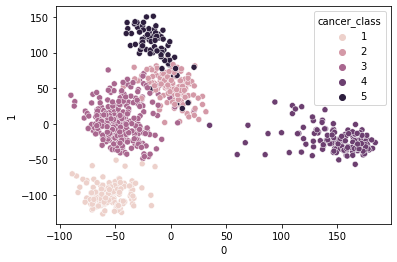

In [49]:
# Use seaborn maps to plot the data on the 5 clusters  
sns.scatterplot(x = 0,y = 1, hue = 'cancer_class',data = df_pca_995)

#### Week2: Dimensionality reduction using  t-SNE

In [50]:
merged_df_tsne = merged_data
non_numeric = ['Unnamed: 0','Class']
merged_df_tsne = merged_df_tsne.drop(non_numeric, axis=1)
merged_df_tsne

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.000000
1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.000000
2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.000000
3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.000000
4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,0.0,1.865642,2.718197,7.350099,10.006003,0.0,6.764792,0.496922,0.0,0.0,...,6.088133,9.118313,10.004852,4.484415,9.614701,12.031267,9.813063,10.092770,8.819269,0.000000
797,0.0,3.942955,4.453807,6.346597,10.056868,0.0,7.320331,0.000000,0.0,0.0,...,6.371876,9.623335,9.823921,6.555327,9.064002,11.633422,10.317266,8.745983,9.659081,0.000000
798,0.0,3.249582,3.707492,8.185901,9.504082,0.0,7.536589,1.811101,0.0,0.0,...,5.719386,8.610704,10.485517,3.589763,9.350636,12.180944,10.681194,9.466711,4.677458,0.586693
799,0.0,2.590339,2.787976,7.318624,9.987136,0.0,9.213464,0.000000,0.0,0.0,...,5.785237,8.605387,11.004677,4.745888,9.626383,11.198279,10.335513,10.400581,5.718751,0.000000


In [51]:
#import T-SNE library from sklearn
from sklearn.manifold import TSNE
tsne_model = TSNE(learning_rate=50)

In [52]:
tnse_features = tsne_model.fit_transform(merged_df_tsne)
tnse_features[1:4,:]

array([[-13.69347 ,   5.532149],
       [ -6.690077, -36.395447],
       [ -6.537254, -35.288013]], dtype=float32)

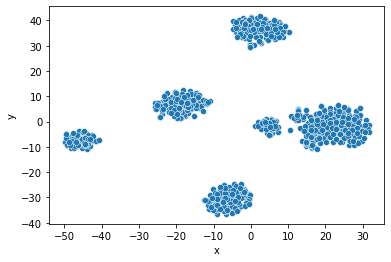

In [53]:
merged_df_tsne['x'] = tnse_features[:,0]
merged_df_tsne['y'] = tnse_features[:,1]

import seaborn as sns
g = sns.scatterplot(x='x',y='y', data=merged_df_tsne)
plt.show()

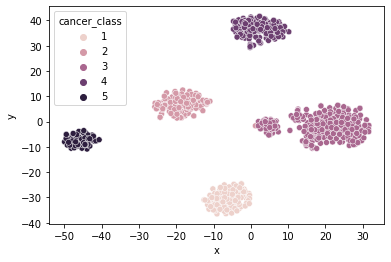

In [54]:
merged_df_tsne['cancer_class']=df_catmapped['Class'] 
sns.scatterplot(x='x',y='y',hue = 'cancer_class', data=merged_df_tsne)
plt.show()

#### Week2: Dimensionality reduction using LDA

In [55]:
merged_df_lda = merged_data.drop(['Unnamed: 0'], axis=1)
merged_df_lda = merged_df_lda.drop(['Class'], axis=1)
x_lda = merged_df_lda
x_lda

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.000000
1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.000000
2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.000000
3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.000000
4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,0.0,1.865642,2.718197,7.350099,10.006003,0.0,6.764792,0.496922,0.0,0.0,...,6.088133,9.118313,10.004852,4.484415,9.614701,12.031267,9.813063,10.092770,8.819269,0.000000
797,0.0,3.942955,4.453807,6.346597,10.056868,0.0,7.320331,0.000000,0.0,0.0,...,6.371876,9.623335,9.823921,6.555327,9.064002,11.633422,10.317266,8.745983,9.659081,0.000000
798,0.0,3.249582,3.707492,8.185901,9.504082,0.0,7.536589,1.811101,0.0,0.0,...,5.719386,8.610704,10.485517,3.589763,9.350636,12.180944,10.681194,9.466711,4.677458,0.586693
799,0.0,2.590339,2.787976,7.318624,9.987136,0.0,9.213464,0.000000,0.0,0.0,...,5.785237,8.605387,11.004677,4.745888,9.626383,11.198279,10.335513,10.400581,5.718751,0.000000


In [56]:
x_lda.shape

(801, 20531)

In [57]:
y_lda = merged_data['Class']
y_lda.values

array([1, 2, 1, 1, 3, 1, 4, 1, 3, 1, 3, 4, 1, 3, 3, 3, 2, 4, 4, 1, 3, 4,
       2, 3, 4, 2, 5, 3, 3, 3, 3, 3, 4, 3, 1, 3, 4, 2, 3, 3, 4, 1, 1, 4,
       4, 3, 1, 5, 3, 2, 3, 2, 3, 1, 5, 3, 3, 5, 4, 3, 2, 4, 3, 2, 1, 5,
       3, 1, 4, 3, 4, 3, 3, 2, 3, 2, 3, 4, 1, 5, 3, 1, 3, 3, 1, 1, 3, 3,
       4, 3, 1, 1, 3, 3, 3, 1, 5, 3, 1, 3, 3, 4, 3, 4, 2, 4, 2, 5, 2, 2,
       1, 3, 2, 1, 3, 4, 4, 4, 3, 3, 2, 4, 2, 3, 1, 1, 1, 3, 4, 2, 5, 3,
       5, 3, 3, 4, 2, 3, 4, 5, 3, 1, 3, 4, 2, 5, 1, 3, 2, 2, 2, 2, 3, 3,
       2, 3, 3, 1, 1, 2, 1, 2, 4, 3, 1, 2, 5, 4, 2, 3, 4, 2, 3, 2, 3, 3,
       3, 1, 3, 4, 5, 4, 3, 1, 1, 1, 2, 2, 3, 2, 2, 4, 2, 1, 2, 3, 3, 3,
       2, 2, 3, 4, 4, 4, 4, 1, 3, 1, 3, 2, 2, 3, 1, 3, 1, 3, 3, 3, 2, 3,
       4, 2, 4, 4, 2, 3, 4, 1, 3, 2, 2, 1, 5, 3, 4, 1, 4, 5, 3, 4, 4, 2,
       1, 1, 2, 2, 4, 3, 3, 5, 3, 1, 5, 3, 1, 4, 1, 1, 1, 3, 5, 5, 2, 5,
       5, 1, 2, 3, 3, 4, 4, 3, 5, 1, 4, 1, 3, 3, 4, 3, 3, 3, 3, 2, 2, 3,
       3, 3, 4, 4, 4, 4, 3, 3, 3, 4, 3, 3, 2, 1, 3,

In [58]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=2)
x_lda_m2 = lda.fit(x_lda,y_lda).transform(x_lda)

In [59]:
lda.explained_variance_ratio_

array([0.36219022, 0.30156109])

In [60]:
x_lda_m3 = pd.DataFrame(data=x_lda_m2)
x_lda_m3['cancer_class']=y_lda
x_lda_m3

,0,1,cancer_class
0,-7.958125,10.922818,1
1,-0.301563,-2.780898,2
2,-6.424952,8.870978,1
3,-6.934259,10.417199,1
4,-2.872004,-4.912284,3
...,...,...,...
796,-2.491183,-6.516482,3
797,0.217789,-1.859410,2
798,-1.426674,-0.474514,5
799,-7.800641,12.104337,1


<AxesSubplot:xlabel='0', ylabel='1'>

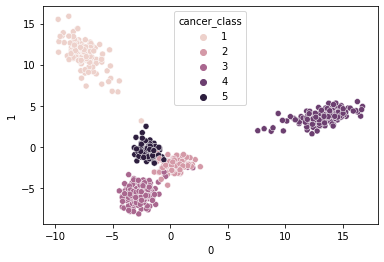

In [61]:
sns.scatterplot(x=0, y=1, hue = 'cancer_class', data=x_lda_m3)

### Project Task: Week 3: Clustering Genes and Samples:

#### Week 3: Clustering Genes and Samples:

##### KMEANS Clustering with PCA = 2

In [62]:
from sklearn.cluster import KMeans
clusters = KMeans(5, n_init = 5)
clusters.fit(X_pca_twoPC) # X_pca_twoPCA corresponds to PCA output with components set to 2

clusters.labels_

array([4, 3, 0, 0, 2, 0, 1, 3, 2, 0, 3, 1, 3, 4, 2, 2, 3, 1, 1, 0, 2, 3,
       3, 0, 1, 3, 0, 2, 3, 2, 2, 2, 1, 4, 0, 2, 1, 3, 0, 4, 1, 0, 3, 1,
       1, 2, 4, 0, 2, 3, 2, 0, 2, 0, 0, 0, 2, 0, 1, 3, 3, 3, 2, 3, 0, 0,
       3, 0, 1, 0, 1, 3, 0, 3, 2, 0, 2, 4, 3, 0, 2, 0, 2, 2, 4, 3, 2, 0,
       1, 0, 0, 0, 2, 4, 2, 0, 0, 2, 2, 3, 2, 1, 2, 1, 3, 1, 0, 0, 0, 3,
       4, 2, 3, 0, 2, 1, 1, 1, 2, 2, 3, 1, 0, 0, 3, 3, 0, 2, 1, 0, 0, 0,
       4, 3, 2, 1, 1, 2, 1, 0, 2, 0, 2, 1, 3, 0, 4, 2, 3, 0, 3, 3, 2, 2,
       3, 3, 2, 3, 0, 3, 4, 3, 1, 3, 3, 3, 0, 1, 3, 2, 1, 3, 2, 0, 2, 0,
       3, 3, 3, 1, 0, 1, 2, 3, 0, 3, 3, 3, 2, 3, 3, 1, 4, 2, 3, 2, 4, 2,
       0, 3, 2, 1, 1, 1, 1, 2, 4, 0, 3, 3, 3, 2, 3, 0, 3, 2, 2, 2, 3, 3,
       1, 3, 1, 1, 3, 2, 1, 0, 2, 3, 4, 2, 0, 4, 1, 3, 1, 0, 3, 1, 1, 2,
       0, 3, 3, 0, 1, 3, 2, 0, 2, 0, 3, 2, 3, 1, 4, 3, 3, 2, 3, 0, 2, 0,
       0, 0, 3, 0, 2, 1, 1, 2, 0, 4, 1, 0, 2, 2, 1, 2, 2, 2, 4, 0, 3, 2,
       2, 2, 1, 1, 1, 1, 4, 2, 2, 1, 2, 2, 3, 3, 3,

In [63]:
pca_with_twoPC_df = pd.DataFrame(data=X_pca_twoPC,columns=['pca1','pca2'])
pca_with_twoPC_df.head()

,pca1,pca2
0,-57.446987,95.410981
1,-16.919430,0.732470
2,-70.345218,-19.303326
3,-49.161591,-9.227586
4,-18.132534,-51.327797


In [64]:
pca_with_twoPC_df['Class_label'] = clusters.labels_
pca_with_twoPC_df['given_cancer_class'] = label.Class.values
pca_with_twoPC_df

,pca1,pca2,Class_label,given_cancer_class
0,-57.446987,95.410981,4,PRAD
1,-16.919430,0.732470,3,LUAD
2,-70.345218,-19.303326,0,PRAD
3,-49.161591,-9.227586,0,PRAD
4,-18.132534,-51.327797,2,BRCA
...,...,...,...,...
796,-12.417385,-42.321574,2,BRCA
797,-29.415554,28.526281,0,LUAD
798,-4.133090,15.690014,3,COAD
799,-30.814757,33.526423,0,PRAD


In [65]:
brca = pca_with_twoPC_df.groupby('given_cancer_class').get_group('BRCA')
brca.Class_label.value_counts()

2    198
3     47
0     36
4     19
Name: Class_label, dtype: int64

In [66]:
coad = pca_with_twoPC_df.groupby('given_cancer_class').get_group('COAD')
coad.Class_label.value_counts()

0    61
4    10
3     7
Name: Class_label, dtype: int64

In [67]:
luad = pca_with_twoPC_df.groupby('given_cancer_class').get_group('LUAD')
luad.Class_label.value_counts()

3    92
0    33
2    10
4     5
1     1
Name: Class_label, dtype: int64

In [68]:
kirc = pca_with_twoPC_df.groupby('given_cancer_class').get_group('KIRC')
kirc.Class_label.value_counts()

1    139
3      6
4      1
Name: Class_label, dtype: int64

In [69]:
prad = pca_with_twoPC_df.groupby('given_cancer_class').get_group('PRAD')
prad.Class_label.value_counts()

3    56
0    55
4    13
2    12
Name: Class_label, dtype: int64

In [70]:
clusters.cluster_centers_

array([[-41.92422247,  16.28080653],
       [ 80.53911417,  32.98851346],
       [ -2.19479126, -52.95519389],
       [ -0.56774771,   2.28012936],
       [-60.8031089 ,  73.86530534]])

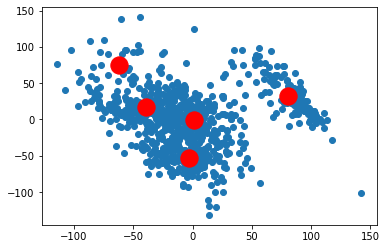

In [71]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X_pca_twoPC)
plt.scatter(X_pca_twoPC[:,0], X_pca_twoPC[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

##### KMEANS Clustering with PCA = .995

In [72]:
#from sklearn.cluster import KMeans
clusters_995 = KMeans(5, n_init = 5)
clusters_995.fit(X_pca_99point5)
clusters_995.labels_

array([2, 3, 2, 2, 1, 2, 0, 2, 1, 2, 1, 0, 2, 1, 1, 1, 3, 0, 0, 2, 1, 0,
       3, 1, 0, 3, 4, 1, 1, 1, 1, 1, 0, 1, 2, 1, 0, 3, 1, 1, 0, 2, 2, 0,
       0, 1, 2, 4, 1, 3, 1, 3, 1, 2, 4, 1, 1, 4, 0, 1, 3, 1, 1, 3, 2, 4,
       1, 2, 0, 1, 0, 1, 1, 3, 1, 3, 1, 0, 2, 4, 1, 2, 1, 1, 2, 2, 1, 1,
       0, 1, 2, 2, 1, 1, 1, 2, 4, 1, 2, 1, 1, 0, 1, 0, 3, 0, 3, 4, 3, 3,
       2, 1, 3, 2, 1, 0, 0, 0, 1, 1, 3, 0, 3, 1, 2, 2, 2, 1, 0, 1, 4, 1,
       4, 1, 1, 0, 3, 1, 0, 4, 1, 2, 1, 0, 3, 4, 2, 1, 3, 3, 3, 3, 1, 1,
       3, 1, 1, 2, 2, 3, 2, 3, 0, 1, 2, 3, 4, 0, 3, 1, 0, 3, 1, 3, 1, 1,
       1, 2, 1, 0, 4, 0, 1, 2, 2, 2, 3, 3, 1, 3, 3, 0, 3, 2, 3, 1, 1, 1,
       3, 3, 1, 0, 0, 0, 0, 2, 1, 2, 1, 3, 3, 1, 2, 1, 2, 1, 1, 1, 3, 1,
       0, 3, 0, 0, 3, 1, 0, 2, 1, 3, 3, 2, 4, 1, 0, 2, 0, 4, 1, 0, 0, 3,
       2, 2, 3, 3, 0, 1, 1, 4, 1, 2, 4, 1, 2, 0, 2, 2, 2, 1, 4, 4, 3, 4,
       4, 2, 3, 1, 1, 0, 0, 1, 4, 2, 0, 2, 1, 1, 0, 1, 1, 1, 1, 3, 3, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 3, 2, 1,

In [73]:
pca_99point5_df = pd.DataFrame(data=X_pca_twoPC,columns=['pca1','pca2'])
pca_99point5_df.head()

,pca1,pca2
0,-57.446987,95.410981
1,-16.919430,0.732470
2,-70.345218,-19.303326
3,-49.161591,-9.227586
4,-18.132534,-51.327797


In [74]:
pca_99point5_df['Class_label'] = clusters.labels_
pca_99point5_df['given_cancer_class'] = label.Class.values

In [75]:
pca_99point5_df.shape

(801, 4)

In [76]:
brca_995 = pca_99point5_df.groupby('given_cancer_class').get_group('BRCA')
brca_995.Class_label.value_counts()

2    198
3     47
0     36
4     19
Name: Class_label, dtype: int64

In [77]:
coad_995 = pca_99point5_df.groupby('given_cancer_class').get_group('COAD')
coad_995.Class_label.value_counts()

0    61
4    10
3     7
Name: Class_label, dtype: int64

In [78]:
luad_995 = pca_99point5_df.groupby('given_cancer_class').get_group('LUAD')
luad_995.Class_label.value_counts()

3    92
0    33
2    10
4     5
1     1
Name: Class_label, dtype: int64

In [79]:
kirc_995 = pca_99point5_df.groupby('given_cancer_class').get_group('KIRC')
kirc_995.Class_label.value_counts()

1    139
3      6
4      1
Name: Class_label, dtype: int64

In [80]:
prad_995 = pca_99point5_df.groupby('given_cancer_class').get_group('PRAD')
prad_995.Class_label.value_counts()

3    56
0    55
4    13
2    12
Name: Class_label, dtype: int64

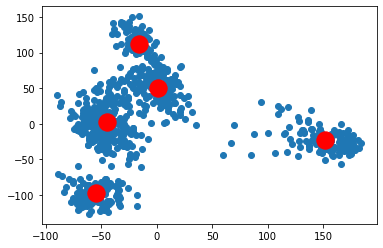

In [81]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X_pca_99point5)
plt.scatter(X_pca_99point5[:,0], X_pca_99point5[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

### Project Task: Week 4: Build Classification Models

#### Week 4: Building Classification Model(s) with Feature Selection:

### Decision Tree Classifier

In [82]:
x_ml = x_lda
y_ml = y_lda
print(x_ml.shape)
print(y_ml.shape)

(801, 20531)
(801,)


In [83]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_ml,y_ml,test_size=0.30,random_state=30)

In [84]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_model = DecisionTreeClassifier(max_depth=5)
dt_model.fit(x_train,y_train)

dt_model.score(x_test,y_test)

y_pred=dt_model.predict(x_test)
print(dt_model.score(x_test,y_test))

0.9585062240663901


### Support Vector Machine Classifier

In [85]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

sv_model = SVC(probability=True, kernel='linear')
sv_model.fit(x_train,y_train)
sv_model.score(x_test,y_test)


y_pred = sv_model.predict(x_test)
print(accuracy_score(y_test,y_pred))

1.0


### Random Forest Classifier

In [86]:
from sklearn import ensemble
rf_model = ensemble.RandomForestClassifier(n_estimators=100)
rf_model.fit(x_train,y_train)
rf_model.score(x_test,y_test)

0.9875518672199171

### Naive Bayes Classifier

In [87]:
from sklearn.naive_bayes import GaussianNB

gnb_model = GaussianNB()
gnb_model.fit(x_train,y_train)
gnb_model.score(x_test,y_test)

0.7385892116182573

### Gradient Boosting Classifier

In [88]:
gb_model = ensemble.GradientBoostingClassifier(n_estimators=40) 
gb_model.fit(x_train,y_train)
gb_model.score(x_test,y_test)

0.9626556016597511

### K-nearest neighbors (KNN) Classifier

In [89]:
from sklearn.neighbors import KNeighborsClassifier
knn_model= KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train,y_train)
knn_model.score(x_test,y_test)

0.995850622406639

# Recursive Feature Elimination

In [90]:
# automatically select the number of features via RFE
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
# define dataset
X = X_pca_99point5
y = merged_data['Class']
#X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# create pipeline
rfe = RFECV(estimator=DecisionTreeClassifier())
model = DecisionTreeClassifier()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# evaluate model'mmnm 
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
#cv = RepeatedStratifiedKFold(n_splits=2, n_repeats=1, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.975 (0.016)


### One way F Test

In [103]:
df_tsne = pd.DataFrame(data=tnse_features,columns=['tsne1','tsne2'])
df_tsne['cancer_type']=label['Class']
df_tsne

,tsne1,tsne2,cancer_type
0,-0.597084,-30.755308,PRAD
1,-13.693470,5.532149,LUAD
2,-6.690077,-36.395447,PRAD
3,-6.537254,-35.288013,PRAD
4,23.679300,-1.491317,BRCA
...,...,...,...
796,24.331879,-0.355141,BRCA
797,-25.114609,6.746962,LUAD
798,-40.703033,-7.175969,COAD
799,-4.194886,-31.243105,PRAD


In [105]:
import scipy.stats as stats

df_anova_tsne = df_tsne[['tsne1','cancer_type']]
grps_tsne = pd.unique(df_anova_tsne.cancer_type.values)

d_data = {grp:df_anova_tsne['tsne1'][df_anova_tsne.cancer_type == grp] for grp in grps_tsne}

F, p = stats.f_oneway(d_data['LUAD'], d_data['PRAD'], d_data['BRCA'], d_data['KIRC'], d_data['COAD'])

if p<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

reject null hypothesis


In [106]:
df_anova_tsne = df_tsne[['tsne2','cancer_type']]
grps_tsne = pd.unique(df_anova_tsne.cancer_type.values)

d_data = {grp:df_anova_tsne['tsne2'][df_anova_tsne.cancer_type == grp] for grp in grps_tsne}

F, p = stats.f_oneway(d_data['LUAD'], d_data['PRAD'], d_data['BRCA'], d_data['KIRC'], d_data['COAD'])

if p<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

reject null hypothesis


### Forward Feature Selection

In [107]:
# install the mlxtend library for forward selection or backward elimination
!pip install mlxtend

In [108]:
# import SequentialFeatureSelector from mlextend and DecisionTreeClassifier from the sklearn library
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
#from sklearn.tree import DecisionTreeClassifier

In [109]:
# calling the decision tree model

dtc1 = DecisionTreeClassifier()
sfs1 = sfs(dtc1, k_features=4, forward=True, verbose=2, scoring='accuracy')

In [110]:
X = X_pca_99point5
y = merged_data['Class']
sfs1 = sfs1.fit(X, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 747 out of 747 | elapsed:    6.4s finished

[2022-06-30 19:52:12] Features: 1/4 -- score: 0.7190916149068324[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 746 out of 746 | elapsed:    6.1s finished

[2022-06-30 19:52:18] Features: 2/4 -- score: 0.9700621118012422[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 745 out of 745 | elapsed:    5.6s finished

[2022-06-30 19:52:23] Features: 3/4 -- score: 0.9787732919254658[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

In [111]:
# merged_data.Class.values # converts the class column to an array 

In [112]:
#The model is trained until four features were selected. Print the feature names:

feat_names = list(sfs1.k_feature_names_)
print(feat_names) #numeric string
feat_names = [int(x) for x in feat_names]
#feat_names =[0, 1, 2, 5]
feat_names # numeric

['0', '1', '2', '5']


[0, 1, 2, 5]

In [113]:
X.shape

(801, 747)

In [114]:
X_pca_99point5

array([[-6.27554152e+01, -9.40719735e+01,  8.95198311e+01, ...,
         3.09258084e+00,  7.13597730e-01, -8.21221710e-02],
       [-2.43289636e+00,  9.05858418e+01, -1.06730787e+00, ...,
         1.39674724e-02, -3.95175744e-01, -9.49947250e-01],
       [-7.12668528e+01, -8.06460774e+00,  6.61124549e+01, ...,
         1.28898532e-01, -2.64530262e-01,  3.84594189e-01],
       ...,
       [ 1.04862615e+01,  2.15705946e+01,  4.13458784e+01, ...,
        -6.47882986e-01, -2.07256774e-01,  1.38942922e-01],
       [-5.50636049e+01, -9.23947780e+01,  8.00500394e+01, ...,
         1.74673062e+00,  2.02232239e+00, -1.92708948e+00],
       [-4.91030338e+01, -5.09976391e+01,  4.05037544e+01, ...,
         1.80367340e+00,  2.22994027e+00, -8.07255452e-01]])

In [115]:
Xnew = pd.DataFrame(X_pca_99point5)
Xnew

,0,1,2,3,4,5,6,7,8,9,...,737,738,739,740,741,742,743,744,745,746
0,-62.755415,-94.071973,89.519831,-15.942567,81.423539,-13.998292,7.716073,-22.936551,-32.837892,-2.202680,...,4.970114,-4.081064,-0.626193,-1.265756,-0.017984,-2.740860,0.944037,3.092581,0.713598,-0.082122
1,-2.432896,90.585842,-1.067308,-53.083120,-15.676684,60.842472,10.257369,-48.822959,14.257400,-12.214352,...,-0.477670,0.215619,-0.593678,-0.403462,1.181537,0.490910,0.197768,0.013967,-0.395176,-0.949947
2,-71.266853,-8.064608,66.112455,81.381475,-7.525685,109.824273,5.519407,-13.364480,38.415728,-5.124731,...,0.263994,0.263786,0.328453,0.004078,0.363928,-1.109210,0.331488,0.128899,-0.264530,0.384594
3,-84.770785,-73.244566,74.181000,27.022697,-18.044895,50.116433,-3.495197,-11.318520,8.319656,-3.149509,...,-1.037772,0.381578,0.652455,-3.624900,-1.203028,-2.347912,1.577992,-0.781748,0.120442,-0.057973
4,-69.560171,-9.612940,-67.497549,34.868543,-1.795849,-6.676780,-2.840781,16.780157,-49.319753,10.508631,...,0.533116,1.488047,2.767486,-0.631562,-0.794275,-0.514008,-1.875969,-2.526109,-1.073803,-1.161728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,-60.861882,-22.278633,-80.927167,42.670292,7.843763,-4.545218,-27.602910,-8.840676,-31.531870,6.380236,...,-1.182374,-0.780676,0.105227,-2.001001,1.579115,0.955344,0.085881,2.667448,0.632850,0.023523
797,-14.465433,53.392194,38.153904,-63.217345,22.799082,39.543441,-47.899401,39.925172,-12.413483,43.364820,...,1.201426,-0.712822,0.624739,-0.162403,-0.238540,0.584705,1.404867,0.564251,-0.054682,-0.905574
798,10.486261,21.570595,41.345878,-59.639929,-2.163066,-96.453878,38.375897,46.997294,60.604643,59.967025,...,0.198424,0.269628,-0.348648,-0.531710,0.055553,0.220559,0.331122,-0.647883,-0.207257,0.138943
799,-55.063605,-92.394778,80.050039,-7.782015,15.180574,2.563620,8.487660,10.571657,11.710577,1.304005,...,-1.373535,0.045885,-2.222754,-4.115667,-0.064646,-0.447662,-0.243658,1.746731,2.022322,-1.927089


In [116]:
df_pca_995['cancer_class']

0      1
1      2
2      1
3      1
4      3
      ..
796    3
797    2
798    5
799    1
800    1
Name: cancer_class, Length: 801, dtype: int64

In [117]:
 X[feat_names] 

array([[-6.27554152e+01, -9.40719735e+01,  8.95198311e+01, ...,
         3.09258084e+00,  7.13597730e-01, -8.21221710e-02],
       [-2.43289636e+00,  9.05858418e+01, -1.06730787e+00, ...,
         1.39674724e-02, -3.95175744e-01, -9.49947250e-01],
       [-7.12668528e+01, -8.06460774e+00,  6.61124549e+01, ...,
         1.28898532e-01, -2.64530262e-01,  3.84594189e-01],
       [-3.63753197e+01, -1.01351157e+02,  5.39319731e+01, ...,
         6.68428454e-01,  1.61936138e+00, -1.02884726e+00]])

In [118]:
# creating a new dataframe using the above variables and adding the target variable
 
new_data_fs = X[feat_names]
new_data_fs = pd.DataFrame(new_data_fs)
new_data_fs['class'] = df_pca_995['cancer_class']


# first five rows of the new data
print(new_data_fs.head(5))

# shape of new and original data
new_data_fs.shape, data.shape

           0           1          2          3          4           5  \
0 -62.755415  -94.071973  89.519831 -15.942567  81.423539  -13.998292   
1  -2.432896   90.585842  -1.067308 -53.083120 -15.676684   60.842472   
2 -71.266853   -8.064608  66.112455  81.381475  -7.525685  109.824273   
3 -36.375320 -101.351157  53.931973  -1.738138   3.940702   -8.232349   

           6          7          8          9  ...       738       739  \
0   7.716073 -22.936551 -32.837892  -2.202680  ... -4.081064 -0.626193   
1  10.257369 -48.822959  14.257400 -12.214352  ...  0.215619 -0.593678   
2   5.519407 -13.364480  38.415728  -5.124731  ...  0.263786  0.328453   
3  17.651078 -17.763020  15.129324  36.070017  ...  0.217054  2.243980   

        740       741       742       743       744       745       746  class  
0 -1.265756 -0.017984 -2.740860  0.944037  3.092581  0.713598 -0.082122      1  
1 -0.403462  1.181537  0.490910  0.197768  0.013967 -0.395176 -0.949947      2  
2  0.004078  0.36392

((4, 748), (801, 20532))

### Backward Feature Elimination

In [119]:
# calling the decision tree model

dtc2 = DecisionTreeClassifier()
sfs2 = sfs(dtc2, k_features=4, forward=False, verbose=2, scoring='accuracy')
X = X_pca_99point5
y = merged_data['Class']
sfs2 = sfs2.fit(X, y)

#The model is trained until four features were selected. Print the feature names:

feat_names = list(sfs2.k_feature_names_)
print(feat_names)

# Taking enormous run time... 

In [ ]:
feat_names = [int(x) for x in feat_names]

In [ ]:
# feat_names
# creating a new dataframe using the above variables and adding the target variable
new_data_be = X[feat_names]
new_data_be = pd.DataFrame(new_data_fs)
new_data_be['class'] = df_pca_995['cancer_class']

# first five rows of the new data
print(new_data_be.head(5))

# shape of new and original data
new_data_be.shape, data.shape

# Deep Neural Network

In [120]:
features=merged_data.drop(['Unnamed: 0'],axis=1)
features=features.drop(['Class'],axis=1)
target=merged_data['Class']
features.head()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [121]:
target.head()

0    1
1    2
2    1
3    1
4    3
Name: Class, dtype: int64

In [122]:
x1=features.values
y1 = pd.get_dummies(y_lda)

In [123]:
from sklearn.model_selection import train_test_split

X1_train, X1_test, y1_train, y1_test = train_test_split(x1,y1, test_size = 0.10, random_state=42)
X1_train.shape,X1_test.shape,y1_test.shape,y1_train.shape

((720, 20531), (81, 20531), (81, 5), (720, 5))

In [124]:
import tensorflow as tf

In [125]:
#Initialize Sequential model
model = tf.keras.models.Sequential()

#adding layers of inout
model.add(tf.keras.layers.Dense(10000, input_dim=20531, activation='relu', kernel_initializer='he_uniform'))


#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

#Add 1st hidden layer
model.add(tf.keras.layers.Dense(5000, activation='relu'))

#Add 2nd hidden layer
model.add(tf.keras.layers.Dense(2000, activation='relu'))

#Add 3rd hidden layer
model.add(tf.keras.layers.Dense(1000, activation='relu'))

#Add 4th hidden layer
model.add(tf.keras.layers.Dense(500, activation='relu'))

#Add 5th hidden layer
model.add(tf.keras.layers.Dense(200, activation='relu'))

#Add 6th hidden layer
model.add(tf.keras.layers.Dense(100, activation='relu'))

#Add OUTPUT layer
model.add(tf.keras.layers.Dense(5, activation='softmax'))

#Create optimizer with non-default learning rate
sgd_optimizer = tf.keras.optimizers.SGD(learning_rate=0.03)

#Compile the model
model.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [126]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10000)             205320000 
                                                                 
 batch_normalization (BatchN  (None, 10000)            40000     
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 5000)              50005000  
                                                                 
 dense_2 (Dense)             (None, 2000)              10002000  
                                                                 
 dense_3 (Dense)             (None, 1000)              2001000   
                                                                 
 dense_4 (Dense)             (None, 500)               500500    
                                                        

In [127]:
history = model.fit(X1_train,y1_train,          
          validation_data=(X1_test,y1_test),
          epochs=5,
          batch_size=32)

Epoch 1/5
23/23 [==============================] - 11s 456ms/step - loss: 0.2387 - accuracy: 0.9417 - val_loss: 7.0087 - val_accuracy: 0.3827
Epoch 2/5
23/23 [==============================] - 10s 439ms/step - loss: 0.0076 - accuracy: 1.0000 - val_loss: 4.1834 - val_accuracy: 0.4444
Epoch 3/5
23/23 [==============================] - 10s 438ms/step - loss: 0.0046 - accuracy: 0.9986 - val_loss: 0.2827 - val_accuracy: 0.8889
Epoch 4/5
23/23 [==============================] - 10s 442ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.1068 - val_accuracy: 0.9877
Epoch 5/5
23/23 [==============================] - 16s 715ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0445 - val_accuracy: 0.9877


In [128]:
test_mod_out = model.predict(X1_test)

In [129]:
y_predict=[]
for k in test_mod_out:
    #np.argmax(k)
    #print(np.argmax(k))
    y_predict.append(np.argmax(k))
    
y_val=[]
for k in y1_test.values:
    #np.argmax(k)
    #print(np.argmax(k))
    y_val.append(np.argmax(k))
    
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_val, y_predict)

array([[14,  0,  0,  0,  0],
       [ 0, 17,  0,  0,  0],
       [ 0,  0, 31,  0,  0],
       [ 0,  0,  1, 11,  0],
       [ 0,  0,  0,  0,  7]], dtype=int64)

In [130]:
_, train_acc = model.evaluate(X1_train, y1_train, verbose=0)
_, test_acc = model.evaluate(X1_test, y1_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.986, Test: 0.988


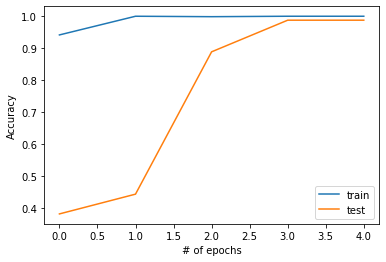

In [131]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.xlabel('# of epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()